# Visualising earnings based on college majors

### Introduction to the project

In this project, I'm going to explore how using the pandas plotting functionality allows us to explore data quickly using visualizations.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

In [1]:
# import the neccesary libraries
import pandas as pd
import matplotlib as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
# read in the csv
recent_grads = pd.read_csv("recent-grads.csv")

In [39]:
# check the first row of the dataset
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# view the first 5 rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [40]:
# view the last 5 rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# check the statistical summary
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# check for missing values
print("Number of na values =", recent_grads.isna().sum().sum())
print("Number of df columns =", len(recent_grads))

Number of na values = 4
Number of df columns = 173


In [41]:
# drop missing values from the dataset
recent_grads = recent_grads.dropna()

In [42]:
# check to make sure all missing values have been removed
print("Number of na values =", recent_grads.isna().sum().sum())
print("Number of df columns =", len(recent_grads))

Number of na values = 0
Number of df columns = 172


### Pandas scatter plots

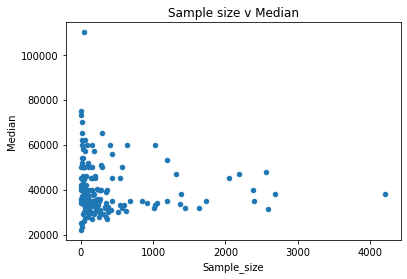

In [10]:
# create scatter plots from pandas
recent_grads.plot(x="Sample_size", y="Median", 
                  kind="scatter", title="Sample size v Median")

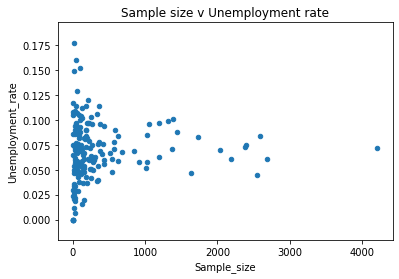

In [11]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", 
                  kind="scatter", title="Sample size v Unemployment rate")

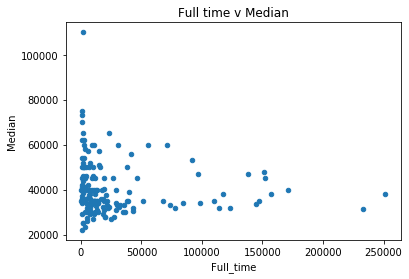

In [12]:
recent_grads.plot(x="Full_time", y="Median", 
                  kind="scatter", title="Full time v Median")

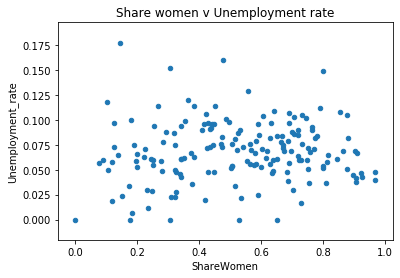

In [13]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", 
                  kind="scatter", title="Share women v Unemployment rate")

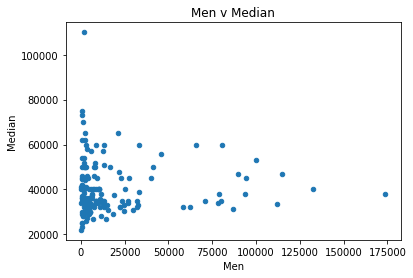

In [14]:
recent_grads.plot(x="Men", y="Median", 
                  kind="scatter", title="Men v Median")

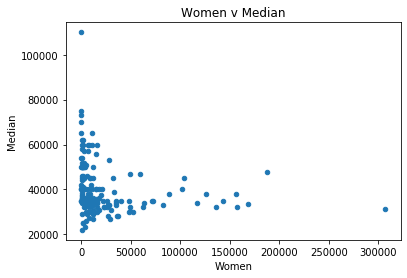

In [15]:
recent_grads.plot(x="Women", y="Median", 
                  kind="scatter", title="Women v Median")

### Pandas histograms

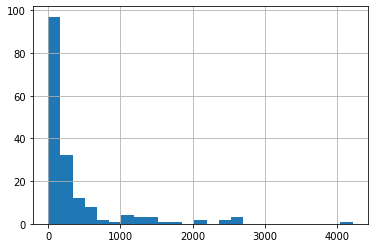

In [43]:
# create histogram from pandas
recent_grads["Sample_size"].hist(bins=25)

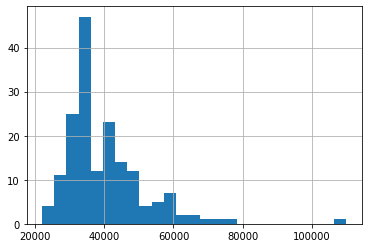

In [17]:
recent_grads["Median"].hist(bins=25)

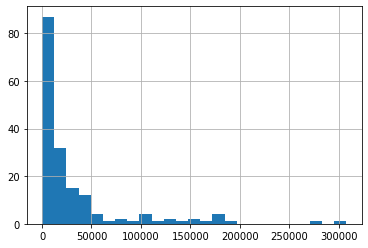

In [18]:
recent_grads["Employed"].hist(bins=25)

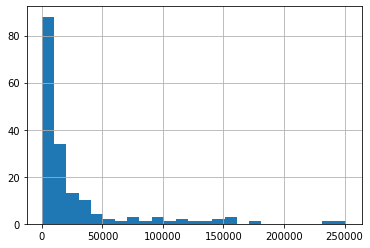

In [19]:
recent_grads["Full_time"].hist(bins=25)

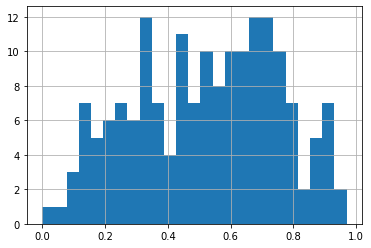

In [20]:
recent_grads["ShareWomen"].hist(bins=25)

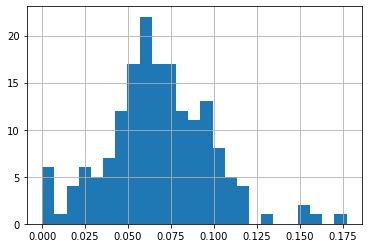

In [21]:
recent_grads["Unemployment_rate"].hist(bins=25)

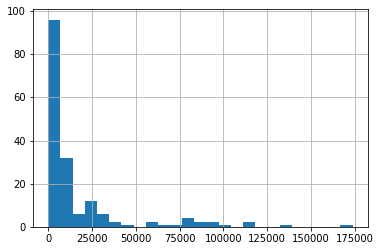

In [22]:
recent_grads["Men"].hist(bins=25)

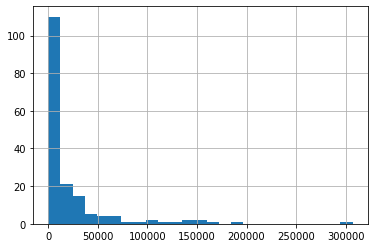

In [23]:
recent_grads["Women"].hist(bins=25)

### Pandas scatter matrix plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3D6569508>,
      dtype=object)

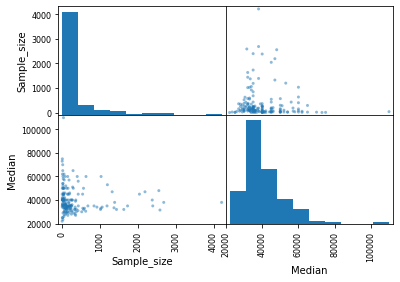

In [44]:
# create scatter matrix plots from pandas
scatter_matrix(recent_grads[["Sample_size", "Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C3D0A01A48>,
      dtype=object)

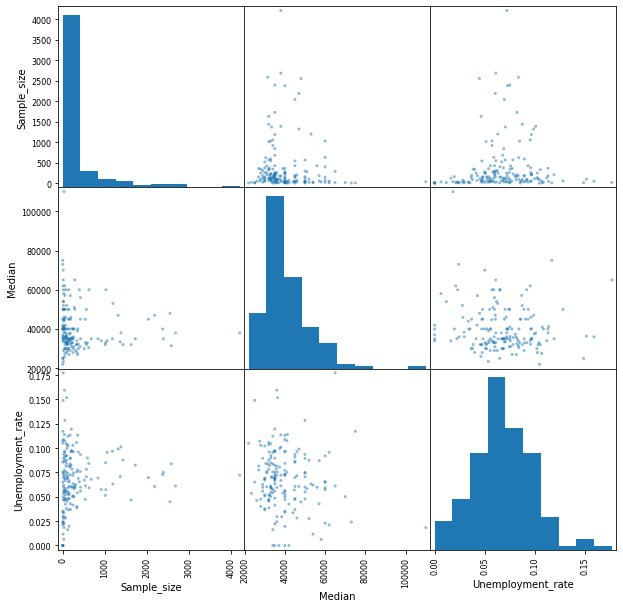

In [30]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], 
               figsize=(10,10))

### Pandas bar plots

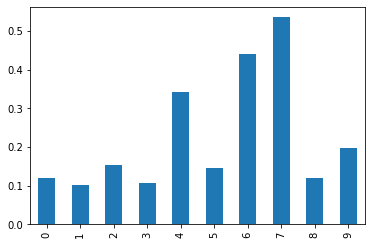

In [45]:
# create bar plots from pandas
recent_grads[:10]["ShareWomen"].plot(kind="bar")

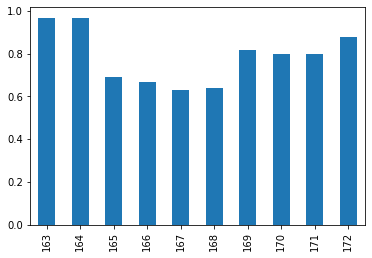

In [37]:
recent_grads[-10:]["ShareWomen"].plot(kind="bar")

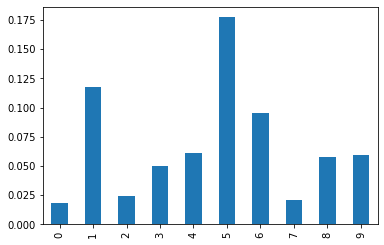

In [35]:
recent_grads[:10]["Unemployment_rate"].plot(kind="bar")

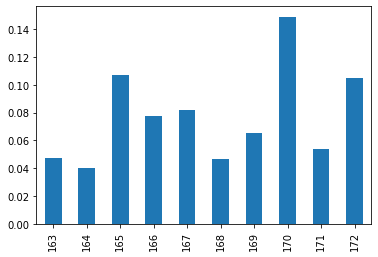

In [38]:
recent_grads[-10:]["Unemployment_rate"].plot(kind="bar")

In this project, we learned how to use the basic plotting tools built into pandas to explore data on job outcomes.